In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from datetime import datetime

In [5]:
import matplotlib.pyplot as plt

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [7]:
import nltk
import string

In [8]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
data = pd.read_csv('/Users/djbetts/Desktop/top-25-cigars/cigar_aficionado.csv', usecols=['name','tasting_notes','score'])

In [11]:
df = data.copy()

In [12]:
df.columns

Index(['name', 'score', 'tasting_notes'], dtype='object')

In [13]:
df.shape

(20769, 3)

In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.head()

,name,score,tasting_notes
0,BOLIVAR ROYAL CORONA,93,"This is an earthy, rich cigar with a lovely br..."
1,DAVIDOFF GRAN CRU NO. 2,89,An enticing cigar that keeps you coming back f...
2,ASHTON CORONA,86,This cigar is well-made and gives plenty of fl...
3,ASHTON MAGNUM,82,"This is a clean, very mild well-made cigar, wi..."
4,ARTURO FUENTE CHATEAU FUENTE SUN GROWN,86,"Finely constructed, A. Fuente's robusto has a ..."


In [67]:
X = df.tasting_notes
corpus = list(X)

In [68]:
corpus[0]

'This is an earthy, rich cigar with a lovely brown wrapper and dense spicy aromas. The flavors are mellow with a clean finish. '

In [69]:
y = df.score

In [70]:
from nltk.corpus import stopwords

In [71]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [72]:
#wordnet lemmatizer and lowercase words.
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]
#split article and return quote

In [74]:
for i, txt in enumerate(test):
    print(f'{i}: {punc_strip(txt)}')

0: This is an earthy  rich cigar with a lovely brown wrapper and dense spicy aromas  The flavors are mellow with a clean finish  
1: An enticing cigar that keeps you coming back for more  Beautifully made with a aluscious brown wrapper and a aslow even draw  it's smooth and rich on the palate witha  awonderful coffee  toffee character 
2: This cigar is well-made and gives plenty of flavor  which goes from coffee to a light spiciness on the palate  
3: This is a clean  very mild well-made cigar  with grassy  earthy aromas and flavors    
4: Finely constructed  A  Fuente's robusto has a nice draw and an elegant texture  It is soft and almost sweet on the palate with well-integrated herbal flavors      
5: This is well made  with a light brown wrapper  It burns a little fast but very even  Flavors are mild and nutty     
6: It looks like a rich maduro  with a very dark brown wrapper and solid construction  This cigar has lots of peppery      nutty flavors and a delicate finish      
7: Mo

In [23]:
#removed '-' for strings like 'well-made' or 'full-bodied'
def punc_strip(doc):
    for char in word_tokenize(doc):
        if char in '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~—':
            doc = doc.replace(char, " ")
        if char == "’":
            doc = doc.replace(char, "")
    return doc

In [83]:
%%time
#create vectorizer

vectorizer = CountVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
#                 strip_accents='ascii', 
#                 lowercase=True, 
                 preprocessor=punc_strip, 
                tokenizer=wordnet_tokenize, 
#                 analyzer='word', 
                stop_words='english',
#                 token_pattern='(?u)\b\w\w+\b', 
                 ngram_range=(1, 2), 
#                  max_df=0.9, 
                min_df=0.01, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 18 µs, sys: 1e+03 ns, total: 19 µs
Wall time: 22.2 µs


In [84]:
X = vectorizer.fit_transform(corpus)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [85]:
print(len(vectorizer.get_feature_names()))

344


In [86]:
from scipy.spatial import distance

In [87]:
a = X[0].toarray()

In [88]:
b = X[100].toarray()

In [89]:
distance.cosine(a, b)

0.8327515979985818

In [90]:
print(distance.cosine([1, 0, 0], [0, 1, 0]))

print(distance.cosine([100, 0, 0], [0, 1, 0]))

print(distance.cosine([1, 1, 0], [0, 1, 0]))

1.0
1.0
0.29289321881345254


# min_df_plot

In [91]:
%%time
num_feat_min = []

min_df = np.linspace(0,0.01,15)

for val in min_df:
    vectorizer_plot = CountVectorizer(#preprocessor=punc_strip,
#                 tokenizer=wordnet_tokenize,
                stop_words='english',
            ngram_range=(1,2),
#                 max_df=0.95,
                 min_df=val,
                 max_features=None)
    
    vectorizer_plot.fit(corpus)
    
    features = vectorizer_plot.get_feature_names()
    stop_word = vectorizer_plot.get_stop_words()

    num_feat_min.append(len(features))

CPU times: user 9.63 s, sys: 177 ms, total: 9.8 s
Wall time: 9.84 s


CPU times: user 15 ms, sys: 1.79 ms, total: 16.8 ms
Wall time: 15.2 ms


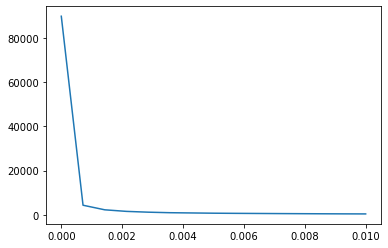

In [92]:
%%time
fig, ax = plt.subplots()
ax.plot(min_df, num_feat_min);

In [93]:
%%time
print(datetime.now())
distortions = []
K = range(1,30)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)

2021-04-02 13:14:57.784904
CPU times: user 14min 2s, sys: 12 s, total: 14min 14s
Wall time: 1min 56s


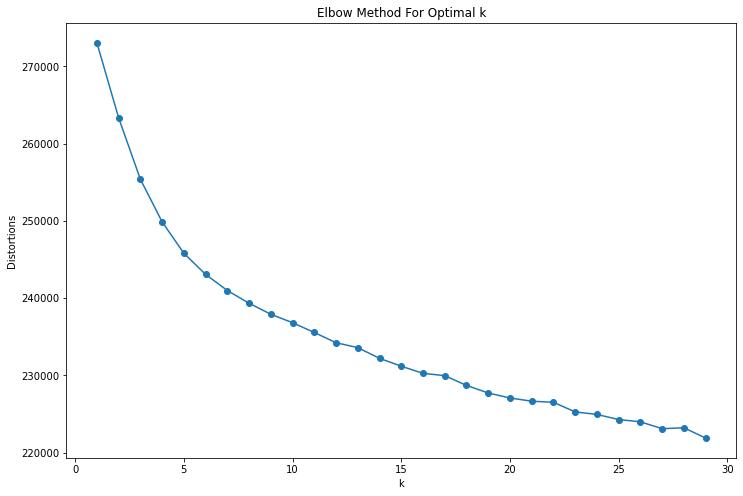

CPU times: user 918 ms, sys: 121 ms, total: 1.04 s
Wall time: 200 ms


In [94]:
%%time
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title("Elbow Method For Optimal k")
plt.show()

# linear regression

In [220]:
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.datasets import load_iris
# from sklearn.decomposition import PCA, TruncatedSVD
# from sklearn.feature_selection import SelectKBest

# X, y = X, y

# # This dataset is way too high-dimensional. Better do PCA:
# pca = TruncatedSVD(n_components=2)

# # Maybe some original features where good, too?
# selection = SelectKBest(k=1)

# # Build estimator from PCA and Univariate selection:

# combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# # Use combined features to transform dataset:
# X_features = combined_features.fit(X, y).transform(X)
# print("Combined space has", X_features.shape[1], "features")

# svm = SVC(kernel="linear")

# # Do grid search over k, n_components and C:

# pipeline = Pipeline([("features", combined_features), ("svm", svm)])

# param_grid = dict(features__pca__n_components=[1, 2, 3],
#                   features__univ_select__k=[1, 2],
#                   svm__C=[0.1, 1, 10])

# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
# grid_search.fit(X, y)
# print(grid_search.best_estimator_)


In [231]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [247]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.6923018712421541

In [251]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

NameError: name 'linear_model' is not defined

In [253]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)


In [255]:
X_test.shape

(4145, 3079)

In [258]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-1.19672234  1.97461333  3.69461296 ... -0.06961293  0.25158763
  1.94314927]
Mean squared error: 2.36
Coefficient of determination: 0.69
